# Supermarket Sales Data Exploration

Notebook này dùng để khám phá và phân tích dữ liệu Supermarket Sales trước khi thực hiện ETL process.


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [2]:
# Load data
data_path = Path('../data/raw/SuperMarketAnalysis.csv')
df = pd.read_csv(data_path)

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")


Dataset shape: (1000, 17)
Columns: ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']


In [3]:
# Basic info
df.info()
print("\n" + "="*50)
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
# Statistical summary
df.describe()


,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("No missing values found!")


Missing values:
Series([], dtype: int64)
No missing values found!


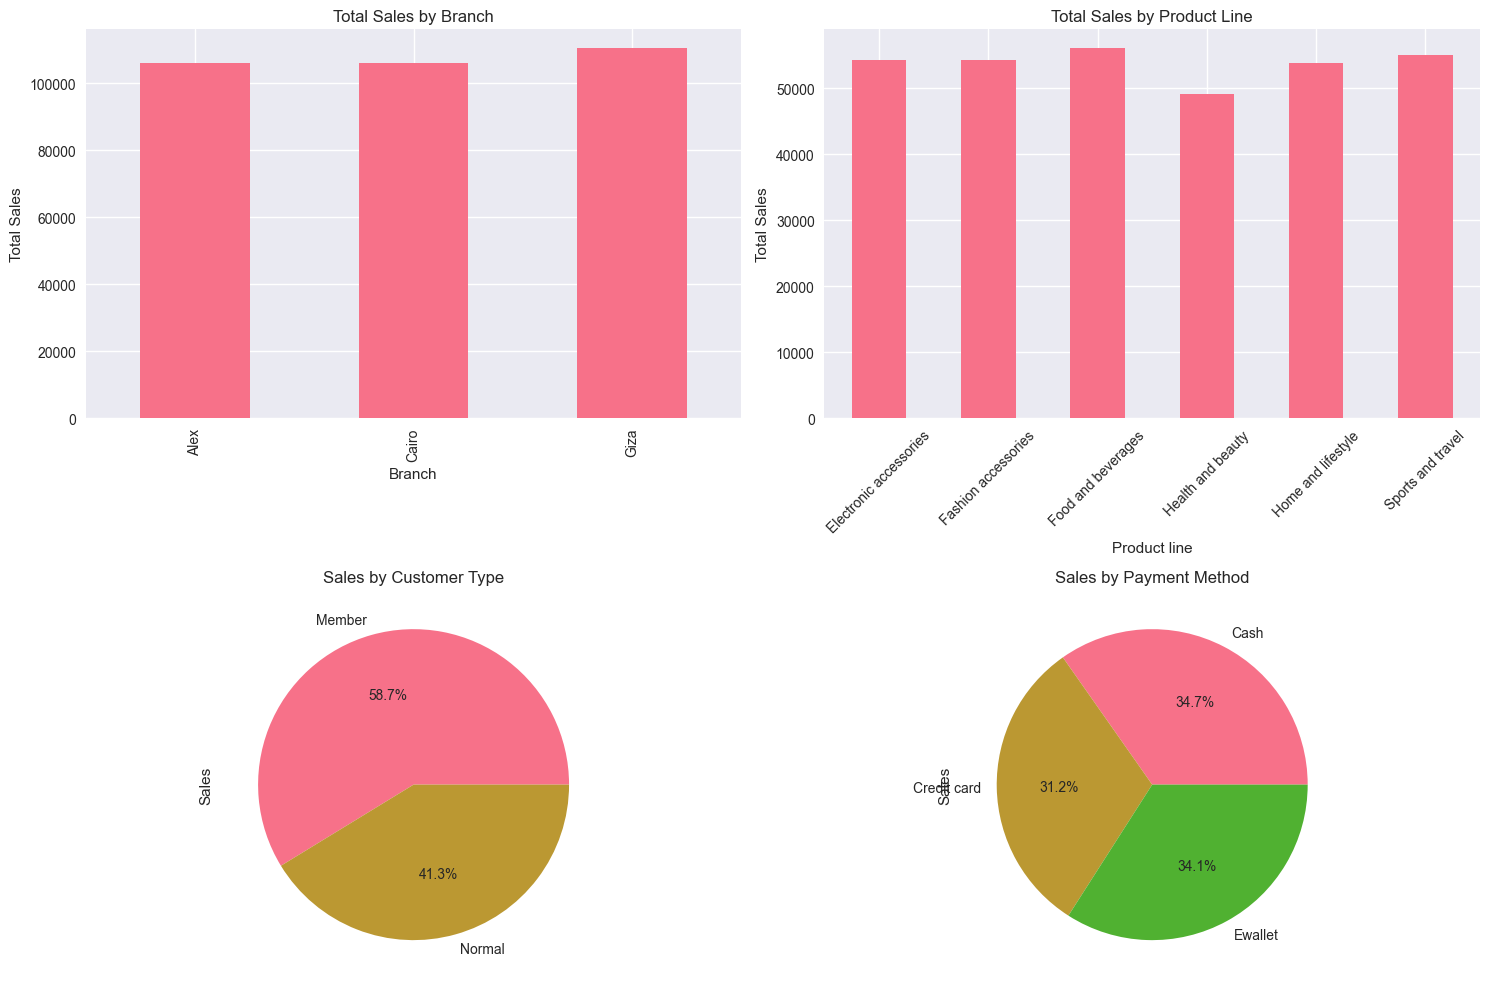

In [6]:
# Sales analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Total sales by branch
df.groupby('Branch')['Sales'].sum().plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Total Sales by Branch')
axes[0,0].set_ylabel('Total Sales')

# Sales by product line
df.groupby('Product line')['Sales'].sum().plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Total Sales by Product Line')
axes[0,1].set_ylabel('Total Sales')
axes[0,1].tick_params(axis='x', rotation=45)

# Sales by customer type
df.groupby('Customer type')['Sales'].sum().plot(kind='pie', ax=axes[1,0], autopct='%1.1f%%')
axes[1,0].set_title('Sales by Customer Type')

# Sales by payment method
df.groupby('Payment')['Sales'].sum().plot(kind='pie', ax=axes[1,1], autopct='%1.1f%%')
axes[1,1].set_title('Sales by Payment Method')

plt.tight_layout()
plt.show()


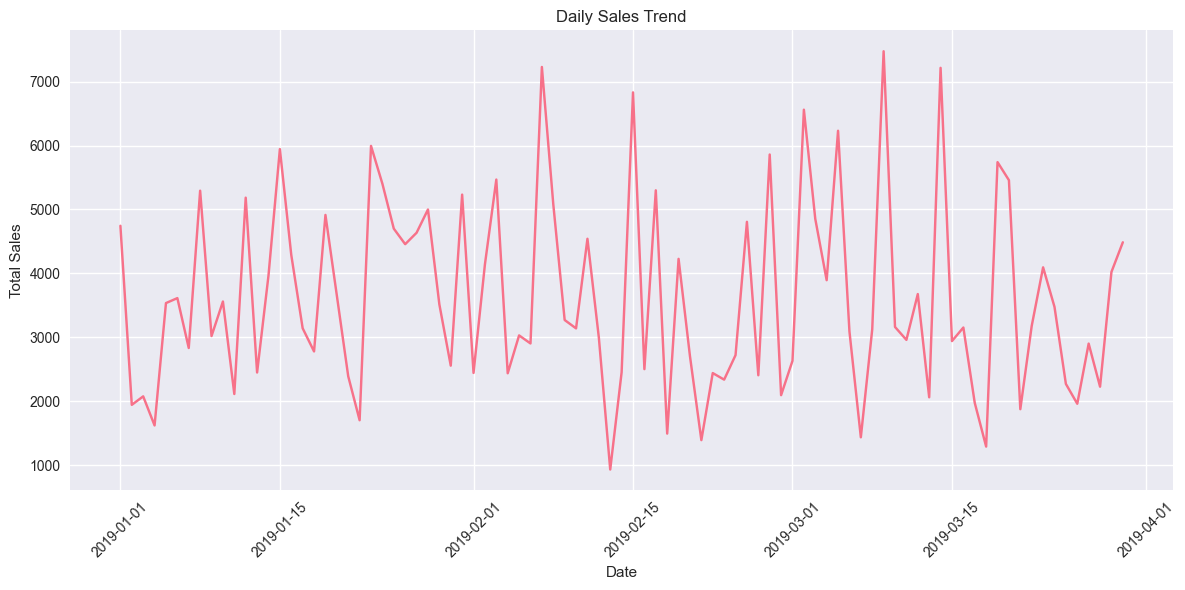

In [7]:
# Time series analysis
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Daily sales trend
daily_sales = df.groupby('Date')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Sales'])
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


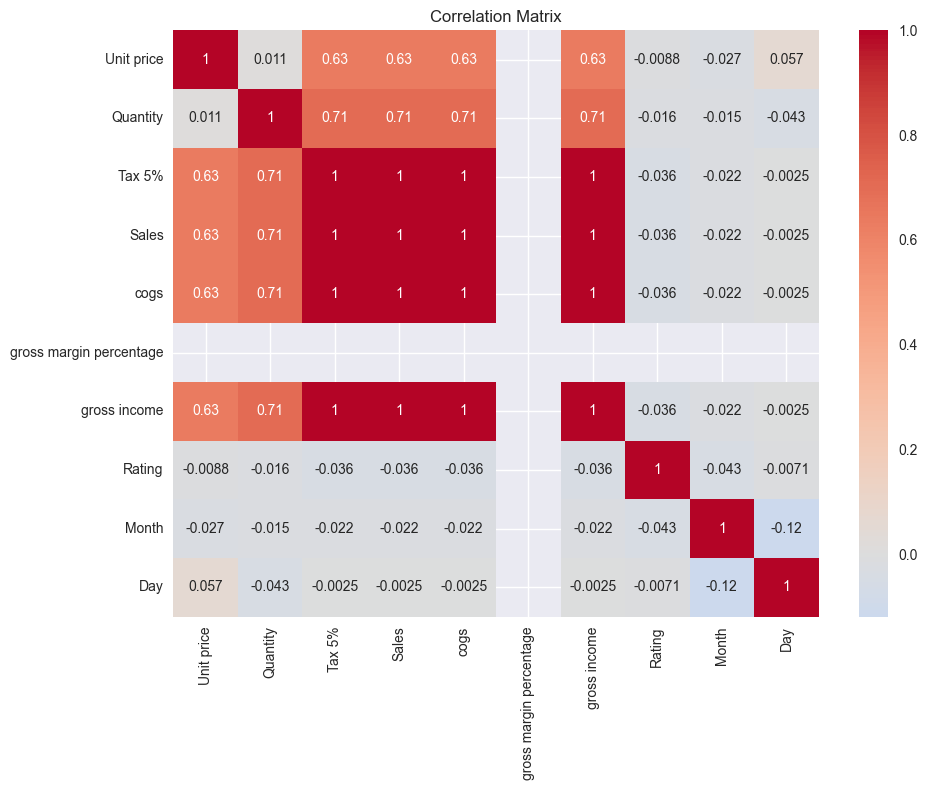

In [8]:
# Correlation analysis
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


In [9]:
# Data quality insights
print("=== DATA QUALITY INSIGHTS ===")
print(f"Total records: {len(df)}")
print(f"Unique invoices: {df['Invoice ID'].nunique()}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Total sales amount: ${df['Sales'].sum():,.2f}")
print(f"Average transaction: ${df['Sales'].mean():.2f}")
print(f"Highest transaction: ${df['Sales'].max():.2f}")
print(f"Lowest transaction: ${df['Sales'].min():.2f}")


=== DATA QUALITY INSIGHTS ===
Total records: 1000
Unique invoices: 1000
Date range: 2019-01-01 00:00:00 to 2019-03-30 00:00:00
Total sales amount: $322,966.75
Average transaction: $322.97
Highest transaction: $1042.65
Lowest transaction: $10.68
